(768, 9) <class 'pandas.core.frame.DataFrame'>
(614, 8)
Epoch 1/80
10/10 [==============================] - 1s 29ms/step - loss: 1.8521 - accuracy: 0.3583 - val_loss: 1.1003 - val_accuracy: 0.3052
Epoch 2/80
10/10 [==============================] - 0s 7ms/step - loss: 0.8773 - accuracy: 0.4072 - val_loss: 0.7325 - val_accuracy: 0.5519
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.7116 - accuracy: 0.5912 - val_loss: 0.7079 - val_accuracy: 0.6039
Epoch 4/80
10/10 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.6205 - val_loss: 0.6865 - val_accuracy: 0.6104
Epoch 5/80
10/10 [==============================] - 0s 6ms/step - loss: 0.6780 - accuracy: 0.6287 - val_loss: 0.6703 - val_accuracy: 0.6234
Epoch 6/80
10/10 [==============================] - 0s 7ms/step - loss: 0.6665 - accuracy: 0.6482 - val_loss: 0.6633 - val_accuracy: 0.6299
Epoch 7/80
10/10 [==============================] - 0s 6ms/step - loss: 0.6612 - accuracy: 0.6596 - val

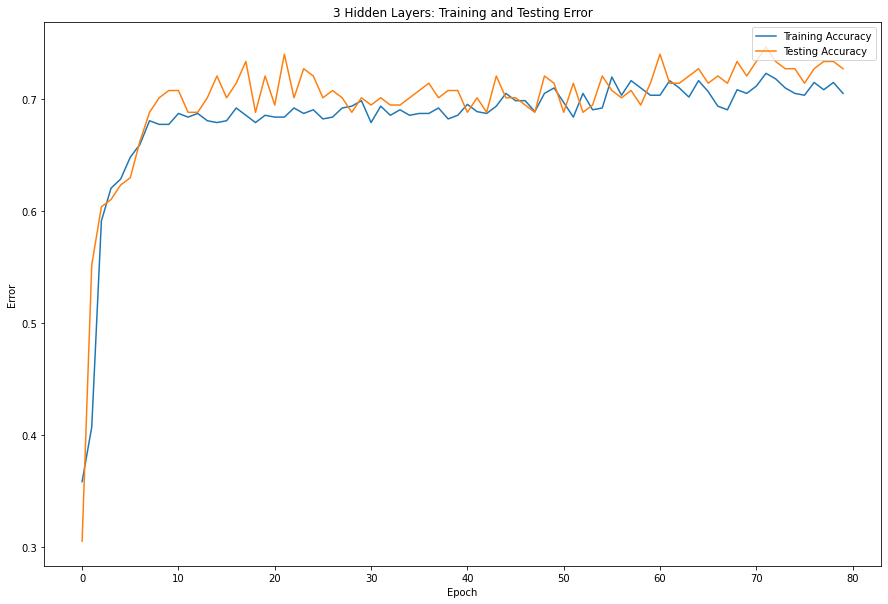

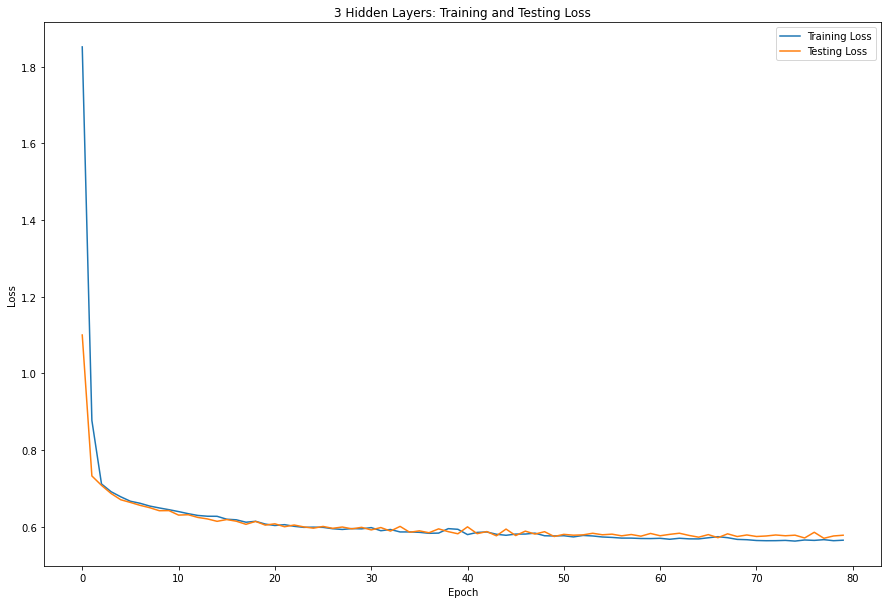

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from sklearn import preprocessing
import tensorflow as tf
import pandas as pd
 
 
url='https://raw.githubusercontent.com/shashankn75/ml_pa2/main/diabetes.csv'
df1 = pd.read_csv(url)
 
print(df1.shape,type(df1))
 
data_mat = df1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
 
#data_mat = df1[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
 
train, test = train_test_split(data_mat, test_size=0.2, shuffle=True)
 
train_feature = train.copy()
train_label = train_feature.pop('Outcome')
test_feature = test.copy()
test_label = test_feature.pop('Outcome') 
 
print(train_feature.shape)
 
#train_feature = preprocessing.normalize(train_feature)
#test_feature = preprocessing.normalize(test_feature)
 
#print(train_feature.shape,test_feature.shape)
#print(train_feature.shape,test_feature.shape)
 

model = Sequential()
 
 
opt = SGD(learning_rate=0.0001, momentum=0.9)
  #model.compile(..., optimizer=opt)
model.add(Dense(128 ,  bias_regularizer=l2(0.01), activation='relu', input_dim=8))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
  # Training the model.
history = model.fit(train_feature, to_categorical(train_label),
                    validation_data=(test_feature, to_categorical(test_label)), epochs=80, batch_size=64)
 
  # Evaluating the model
loss, accuracy = model.evaluate(test_feature, to_categorical(test_label))
print('\n\n Loss', loss, 'Accuracy:', accuracy)
 
#############  plot
 
###saving the weights and model
model.save('3hidden_nwk.hd5')
#model.save_weights('3hidden_weights')
#model.load_weights('3hidden_weights')


# Plot the accuracy and loss.
 
# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('3 Hidden Layers: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()
 
# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3 Hidden Layers: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()